# Downside Measures: Semi-Deviation, VaR and CVaR

What Is Downside? Downside is the negative movement in the price of a security, sector or market.

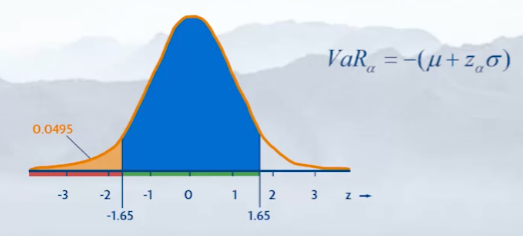


In [1]:
import pandas as pd
import veer_risk_kit as vrk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
hfi=vrk.get_hfi_returns()

In [3]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


# Semideviation

In [4]:
hfi.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

### however we only compute the deviation towards the downside

In [5]:
hfi[hfi<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

## lets use our own function semideviation(r)

In [6]:
vrk.semideviation(hfi)  

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

# VaR and CVaR

### Value At Risk

- Historic VaR
- Parametric VaR - Gaussian
- Modified Cornish-Fisher VaR

## Historic VaR

Historical value at risk (VaR), also known as historical simulation or the historical method, refers to a particular way of calculating VaR. In this approach we calculate VaR directly from past returns. For example, suppose we want to calculate the 1-day 95% VaR for an equity using 100 days of data. The 95th percentile corresponds to the least worst of the worst 5% of returns. In this case, because we are using 100 days of data, the VaR simply corresponds to the 5th worst day. https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/value-at-risk-var/



In [7]:
hfi.columns

Index(['Convertible Arbitrage', 'CTA Global', 'Distressed Securities',
       'Emerging Markets', 'Equity Market Neutral', 'Event Driven',
       'Fixed Income Arbitrage', 'Global Macro', 'Long/Short Equity',
       'Merger Arbitrage', 'Relative Value', 'Short Selling',
       'Funds Of Funds'],
      dtype='object')

In [8]:
import numpy as np

In [9]:
np.percentile(hfi,5)

-0.0274

In [10]:
np.percentile(hfi,5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [11]:
def var_historic(r,level=5):
    """
    VaR Historic
    """
    if isinstance(r,pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r,pd.Series):
        return np.percentile(r, level)
    else:
        raise TypeError("Expected r to be Series or DataFrame")        

In [12]:
var_historic(hfi)

Convertible Arbitrage    -0.01576
CTA Global               -0.03169
Distressed Securities    -0.01966
Emerging Markets         -0.04247
Equity Market Neutral    -0.00814
Event Driven             -0.02535
Fixed Income Arbitrage   -0.00787
Global Macro             -0.01499
Long/Short Equity        -0.02598
Merger Arbitrage         -0.01047
Relative Value           -0.01174
Short Selling            -0.06783
Funds Of Funds           -0.02047
dtype: float64

### Lets make all positive

In [13]:
def var_historic(r,level=5):
    """
    VaR Historic
    """
    if isinstance(r,pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r,pd.Series):
        return -np.percentile(r,level)
    else:
        raise TypeError("Expected r to be Series or DataFrame")

In [14]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

## Lets do it by our own function

In [15]:
vrk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [16]:
from scipy.stats import norm

In [17]:
norm.ppf(.05)

-1.6448536269514729

In [18]:
norm.ppf(.01)

-2.3263478740408408

In [19]:
z=norm.ppf(.05)
z

-1.6448536269514729

In [20]:
hfi.mean()+z*hfi.std(ddof=0)

Convertible Arbitrage    -0.021691
CTA Global               -0.034235
Distressed Securities    -0.021032
Emerging Markets         -0.047164
Equity Market Neutral    -0.008850
Event Driven             -0.021144
Fixed Income Arbitrage   -0.014579
Global Macro             -0.018766
Long/Short Equity        -0.026397
Merger Arbitrage         -0.010435
Relative Value           -0.013061
Short Selling            -0.080086
Funds Of Funds           -0.021292
dtype: float64

In [21]:
-(hfi.mean()+z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

## CVaR (BeyondVaR)
Definition: CVaR is derived by taking a weighted average of the “extreme” losses in the tail of the distribution of possible returns, beyond the value at risk (VaR) cutoff point. URL: https://www.investopedia.com/terms/c/conditional_value_at_risk.asp
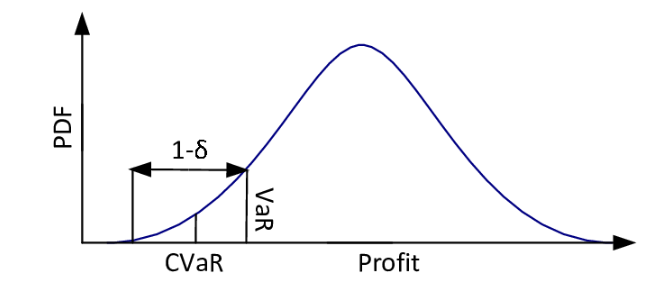

In [22]:
vrk.cvar_historic(hfi)    

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

## Gaussian Pasrametric VaR (standard normal gaussian)
$$ VaR = - (mean + z * std) $$

In [23]:
vrk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

## Cornish-Fisher VaR

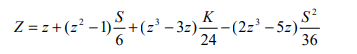

In [24]:
vrk.var_gaussian(hfi, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

<AxesSubplot:title={'center':'Hedge Fund Indices: VaR'}>

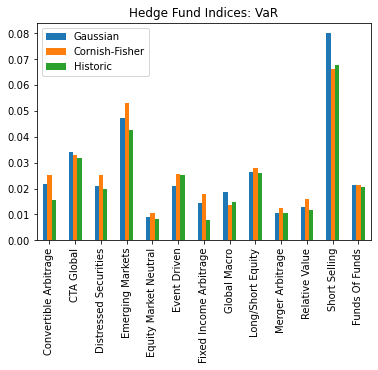

In [25]:
var_list=[vrk.var_gaussian(hfi), vrk.var_gaussian(hfi, modified=True), var_historic(hfi)]   ### erk.var_historic(hfi) not working ???
comparison=pd.concat(var_list, axis=1)
comparison.columns=["Gaussian","Cornish-Fisher","Historic"]
comparison.plot.bar(title="Hedge Fund Indices: VaR")